# Introduction

Source: https://datahack.analyticsvidhya.com/contest/janatahack-customer-segmentation/#ProblemStatement

### Problem Statement

An automobile company has plans to enter new markets with their existing products (P1, P2, P3, P4 and P5). After intensive market research, they’ve deduced that the behavior of new market is similar to their existing market. 

In their existing market, the sales team has classified all customers into 4 segments (A, B, C, D ). Then, they performed segmented outreach and communication for different segment of customers. This strategy has work exceptionally well for them. They plan to use the same strategy on new markets and have identified 2627 new potential customers. 

You are required to help the manager to predict the right group of the new customers.

### Data Description 

|Variable|	Definition|
|---|-:|
|ID|	Unique ID|
|Gender|	Gender of the customer|
|Ever_Married|	Marital status of the customer|
|Age|	Age of the customer|
|Graduated|	Is the customer a graduate?|
|Profession|	Profession of the customer|
|Work_Experience|	Work Experience in years|
|Spending_Score|	Spending score of the customer|
|Family_Size|	Number of family members for the customer (including the customer)|
|Var_1|	Anonymised Category for the customer|
|Segmentation|	(target) Customer Segment of the customer|

sample_submission.csv

ID: Unique ID

Segmentation: Predicted segment for customers in the test set

### Evaluation Metric
The evaluation metric for this hackathon is Accuracy Score.


### Public and Private split
The public leaderboard is based on 40% of test data, while final rank would be decided on remaining 60% of test data (which is private leaderboard)

In [2]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [23]:
train = pd.read_csv('Train_aBjfeNk.csv')

In [24]:
train.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               8068 non-null   int64  
 1   Gender           8068 non-null   object 
 2   Ever_Married     7928 non-null   object 
 3   Age              8068 non-null   int64  
 4   Graduated        7990 non-null   object 
 5   Profession       7944 non-null   object 
 6   Work_Experience  7239 non-null   float64
 7   Spending_Score   8068 non-null   object 
 8   Family_Size      7733 non-null   float64
 9   Var_1            7992 non-null   object 
 10  Segmentation     8068 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 693.5+ KB


Columns with missing data:
- Ever_married
- Graduated
- Profession
- Work Expereience
- Family Size
- Var_1

In [8]:
train.describe(include='all')

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
count,8068.000000,8068,7928,8068.000000,7990,7944,7239.000000,8068,7733.000000,7992,8068
unique,NaN,2,2,NaN,2,9,NaN,3,NaN,7,4
top,NaN,Male,Yes,NaN,Yes,Artist,NaN,Low,NaN,Cat_6,D
freq,NaN,4417,4643,NaN,4968,2516,NaN,4878,NaN,5238,2268
mean,463479.214551,NaN,NaN,43.466906,NaN,NaN,2.641663,NaN,2.850123,NaN,NaN
std,2595.381232,NaN,NaN,16.711696,NaN,NaN,3.406763,NaN,1.531413,NaN,NaN
min,458982.000000,NaN,NaN,18.000000,NaN,NaN,0.000000,NaN,1.000000,NaN,NaN
25%,461240.750000,NaN,NaN,30.000000,NaN,NaN,0.000000,NaN,2.000000,NaN,NaN
50%,463472.500000,NaN,NaN,40.000000,NaN,NaN,1.000000,NaN,3.000000,NaN,NaN
75%,465744.250000,NaN,NaN,53.000000,NaN,NaN,4.000000,NaN,4.000000,NaN,NaN


Columns with missing data:
- Ever_Married
- Graduated
- Profession
- Work Experience
- Family_Size
- Var_1

In [9]:
train.Segmentation.value_counts()

Segmentation
D    2268
A    1972
C    1970
B    1858
Name: count, dtype: int64

Slight Imbalanced, multi-class data - 4 classes - A, B, C, D.

In [10]:
train.value_counts()

ID      Gender  Ever_Married  Age  Graduated  Profession     Work_Experience  Spending_Score  Family_Size  Var_1  Segmentation
458982  Male    Yes           61   Yes        Executive      1.0              High            3.0          Cat_6  C               1
465191  Female  No            58   Yes        Engineer       1.0              Low             1.0          Cat_6  A               1
465023  Male    Yes           43   Yes        Artist         9.0              Average         2.0          Cat_2  C               1
465022  Female  Yes           72   Yes        Lawyer         0.0              High            2.0          Cat_6  C               1
465021  Male    Yes           62   Yes        Entertainment  0.0              Average         3.0          Cat_6  C               1
                                                                                                                                 ..
462030  Male    No            36   Yes        Artist         11.0             Low

In [11]:
train.Gender.value_counts(dropna=False)

Gender
Male      4417
Female    3651
Name: count, dtype: int64

## Ever Married

In [12]:
train.Ever_Married.value_counts(dropna=False)

Ever_Married
Yes    4643
No     3285
NaN     140
Name: count, dtype: int64

In [15]:
train[train.Ever_Married.isnull()]

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
24,461021,Female,NaN,58,No,Executive,1.0,Average,3.0,Cat_3,B
108,466466,Female,NaN,19,No,Healthcare,6.0,Low,5.0,Cat_3,D
201,466065,Male,NaN,19,No,Healthcare,9.0,Low,3.0,Cat_3,D
213,460516,Female,NaN,85,No,Lawyer,0.0,High,1.0,Cat_3,C
272,464841,Male,NaN,19,No,Entertainment,0.0,High,3.0,Cat_4,D
...,...,...,...,...,...,...,...,...,...,...,...
7756,465987,Male,NaN,20,No,Healthcare,1.0,Low,3.0,Cat_2,D
7775,462989,Male,NaN,32,Yes,Healthcare,1.0,Low,1.0,Cat_6,D
8011,466026,Female,NaN,49,No,Entertainment,0.0,Low,1.0,Cat_3,A
8030,459082,Male,NaN,45,Yes,Artist,1.0,Low,NaN,Cat_6,A


## Graduated

In [13]:
train.Graduated.value_counts(dropna=False)

Graduated
Yes    4968
No     3022
NaN      78
Name: count, dtype: int64

In [16]:
train[train.Graduated.isnull()]

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
57,462267,Male,No,32,NaN,Doctor,8.0,Low,2.0,Cat_6,D
220,464613,Female,No,35,NaN,Artist,0.0,Low,3.0,Cat_6,B
290,465058,Female,No,43,NaN,Entertainment,NaN,Low,1.0,Cat_6,B
431,462548,Male,No,18,NaN,Executive,NaN,Low,5.0,Cat_4,A
510,460685,Male,No,51,NaN,Artist,6.0,Low,4.0,Cat_4,B
...,...,...,...,...,...,...,...,...,...,...,...
7602,466506,Male,Yes,50,NaN,Artist,1.0,Average,4.0,Cat_6,A
7743,467388,Male,No,35,NaN,NaN,0.0,Low,NaN,Cat_6,D
7829,460567,Male,No,39,NaN,Entertainment,8.0,Low,4.0,Cat_3,C
7987,462933,Male,Yes,55,NaN,Entertainment,NaN,High,5.0,Cat_6,B


## Profession

In [14]:
train.Profession.value_counts(dropna=False)

Profession
Artist           2516
Healthcare       1332
Entertainment     949
Engineer          699
Doctor            688
Lawyer            623
Executive         599
Marketing         292
Homemaker         246
NaN               124
Name: count, dtype: int64

In [15]:
train.Spending_Score.value_counts(dropna=False)

Spending_Score
Low        4878
Average    1974
High       1216
Name: count, dtype: int64

## Family Size

In [16]:
train.Family_Size.value_counts(dropna=False)

Family_Size
2.0    2390
3.0    1497
1.0    1453
4.0    1379
5.0     612
NaN     335
6.0     212
7.0      96
8.0      50
9.0      44
Name: count, dtype: int64

In [25]:
train.Family_Size.fillna(-1, inplace=True)

<Axes: xlabel='Family_Size', ylabel='count'>

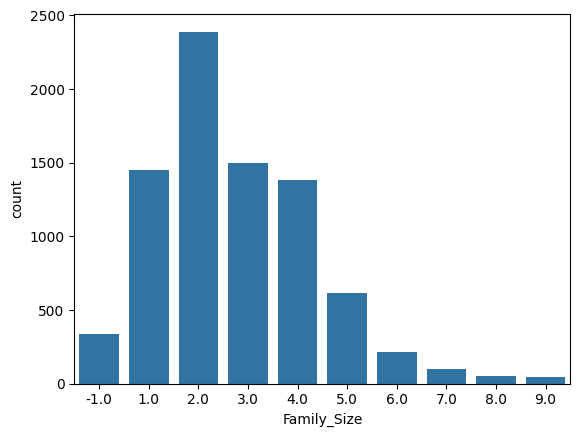

In [26]:
sns.countplot(train, x='Family_Size')

<Axes: xlabel='Family_Size', ylabel='Var_1'>

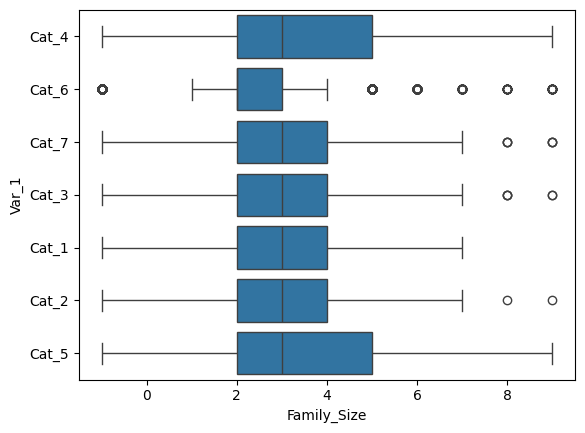

In [34]:
sns.boxplot(train, x='Family_Size', y='Var_1')

<Axes: xlabel='Age', ylabel='Probability'>

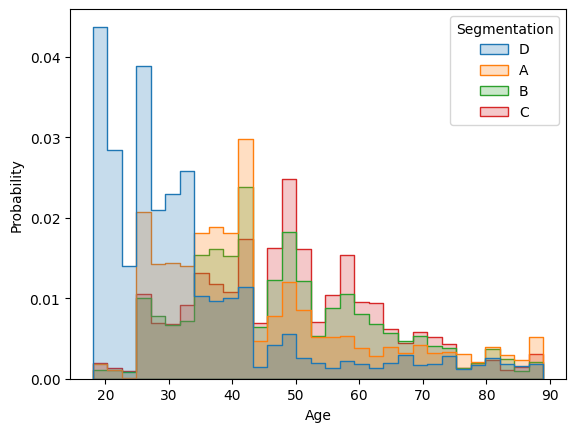

In [23]:
sns.histplot(train, x='Age', hue='Segmentation', element='step', stat='probability')

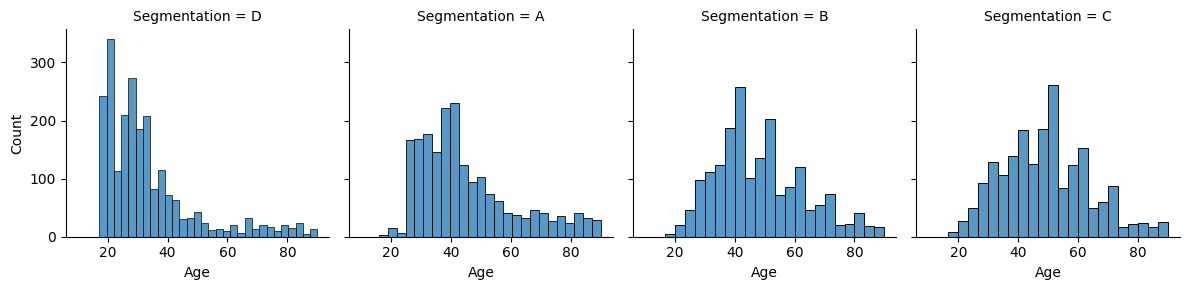

In [22]:
g = sns.FacetGrid(train, col="Segmentation")
# , binwidth=2, binrange=(0, 60)
g.map_dataframe(sns.histplot, x="Age", binrange=(10, 90))

## Work Experience

<Axes: xlabel='Work_Experience', ylabel='count'>

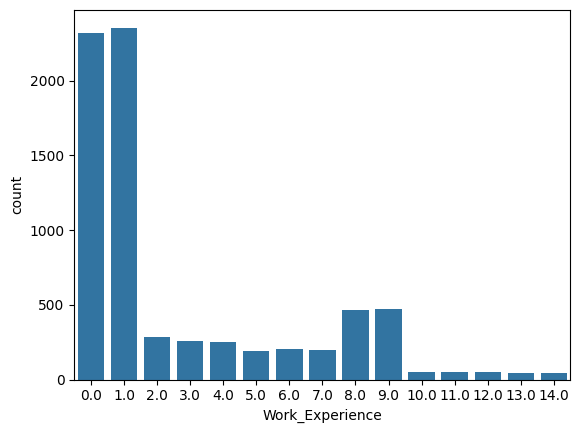

In [35]:
sns.countplot(train, x='Work_Experience')

In [36]:
train['Work_Experience'].describe()

count    7239.000000
mean        2.641663
std         3.406763
min         0.000000
25%         0.000000
50%         1.000000
75%         4.000000
max        14.000000
Name: Work_Experience, dtype: float64

<Axes: xlabel='Work_Experience', ylabel='Probability'>

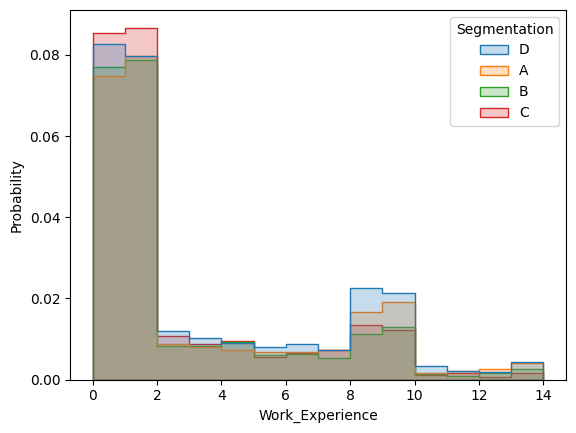

In [32]:
sns.histplot(train, x='Work_Experience', hue='Segmentation', binwidth=1, element='step', stat='probability')

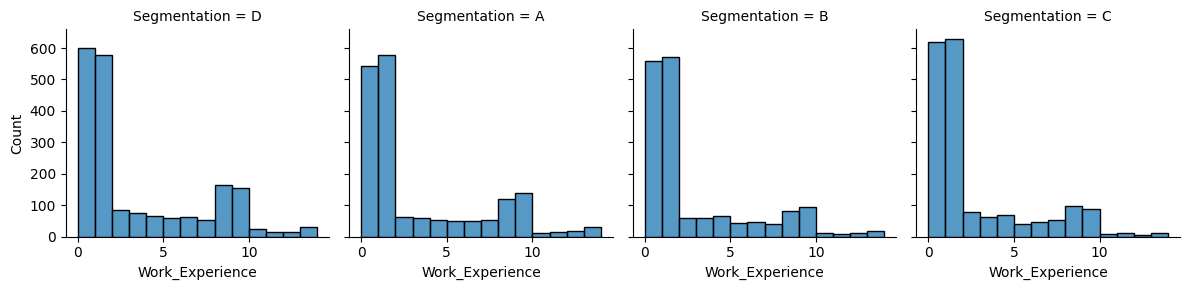

In [31]:
g = sns.FacetGrid(train, col="Segmentation")
# , binwidth=2, binrange=(0, 60)
g.map_dataframe(sns.histplot, binwidth=1, x="Work_Experience")

In [29]:
train[train.Segmentation=='C'].Work_Experience.value_counts()

Work_Experience
1.0     628
0.0     619
8.0      97
9.0      89
2.0      77
4.0      68
3.0      63
7.0      52
6.0      47
5.0      41
11.0     11
10.0      8
13.0      7
14.0      4
12.0      4
Name: count, dtype: int64

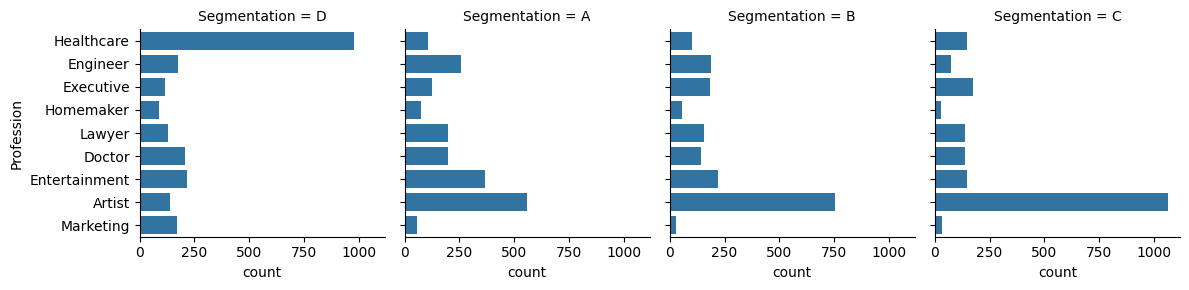

In [41]:
g = sns.FacetGrid(train, col="Segmentation")
g.map_dataframe(sns.countplot, y="Profession")

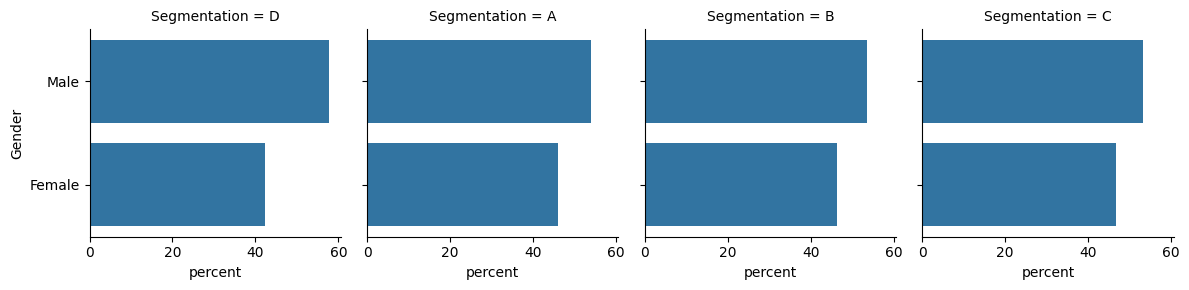

In [43]:
g = sns.FacetGrid(train, col="Segmentation")
g.map_dataframe(sns.countplot, y="Gender", stat='percent')

<Axes: xlabel='Gender', ylabel='percent'>

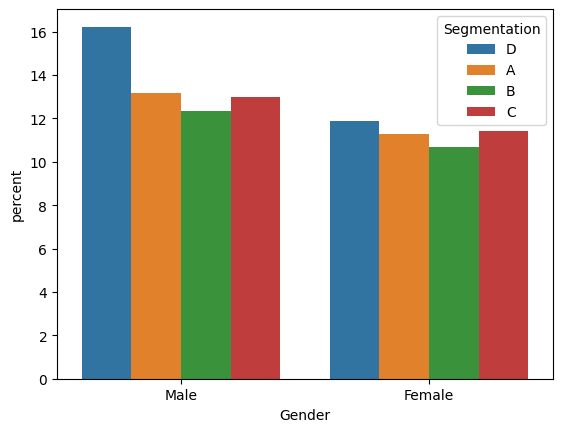

In [45]:
sns.countplot(train, x='Gender', hue='Segmentation', stat='percent')

<Axes: xlabel='Ever_Married', ylabel='percent'>

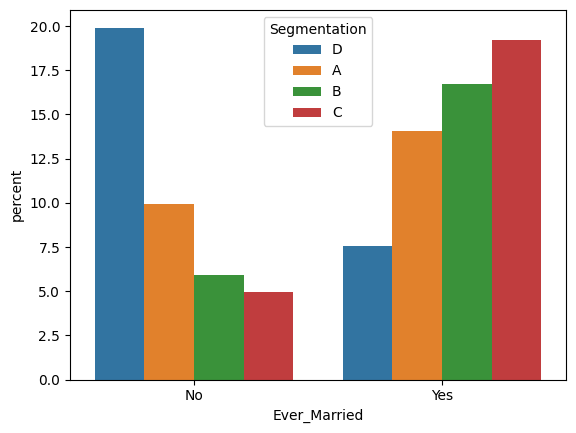

In [46]:
sns.countplot(train, x='Ever_Married', hue='Segmentation', stat='percent')

<Axes: xlabel='Graduated', ylabel='percent'>

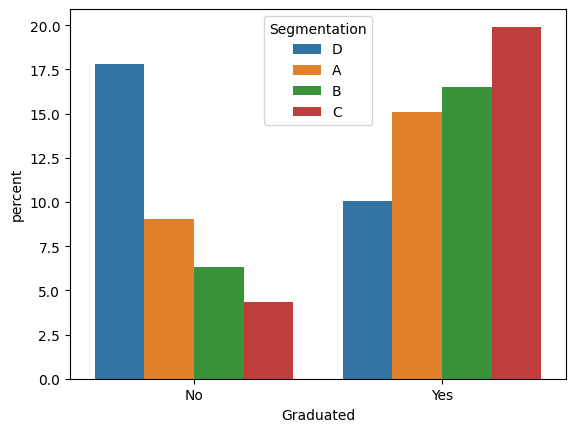

In [47]:
sns.countplot(train, x='Graduated', hue='Segmentation', stat='percent')

In [ ]:
train.corr(method='spearman')

In [62]:
train[train.columns[~train.columns.isin(['ID', 'Segmentation'])]].columns

Index(['Gender', 'Ever_Married', 'Age', 'Graduated', 'Profession',
       'Work_Experience', 'Spending_Score', 'Family_Size', 'Var_1'],
      dtype='object')

In [63]:
feature_cols = ['Gender', 'Ever_Married', 'Age', 'Graduated', 'Profession',
       'Work_Experience', 'Spending_Score', 'Family_Size', 'Var_1']

In [64]:
train[feature_cols].corr(method='spearman')

ValueError: could not convert string to float: 'Male'